In [46]:
%load_ext autoreload
%autoreload

import io
import os
import sys
import django
import glob
import json
import re
import requests
import pandas as pd
from IPython.core.debugger import set_trace
from pathlib import Path
from django.core.files.base import ContentFile
from rest_framework import serializers
from tqdm.notebook import tqdm
from PIL import Image, ImageSequence

parentdir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parentdir)
django.setup()

import getch.models as m

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
_pix = m.Pix.objects.all()[3]

In [56]:
_pix.__dict__

{'_state': <django.db.models.base.ModelState at 0x1283c05e0>,
 'id': 4034,
 'owner_id': 426,
 'src': 'post/2021/3/26/magrittelim@gmail.com/2021-03-26_084842.574342__blob',
 'desc': '자라 zara | 하이메 아욘 컬렉션 니트',
 'tokens': 'forehead jeans eye sky azure human flash_photography sleeve happy cool black_hair electric_blue t-shirt fun landscape ocean horizon pattern top 이마 청바지 눈 하늘 하늘빛 인간 플래시사진 소매 행복 멋있는 흑발 강청색 티셔츠 장난 경치 대양 수평선 무늬 상단 자라 zara 하이메 아욘 컬렉션 니트',
 'tokens_ko': '청바지 하늘빛 티셔츠 찐청색 티셔츠 패턴있는 상의 자라 하이메 아욘 컬렉션 니트',
 'outlink': 'https://www.zara.com/kr/ko/--jaime-hayon-%ec%9e%90%ec%b9%b4%eb%93%9c-%ec%8a%a4%ec%9b%a8%ed%84%b0-p03597428.html?v1=103429222',
 'created_at': datetime.datetime(2021, 3, 27, 17, 22, 59, 143838),
 'type': 'M'}

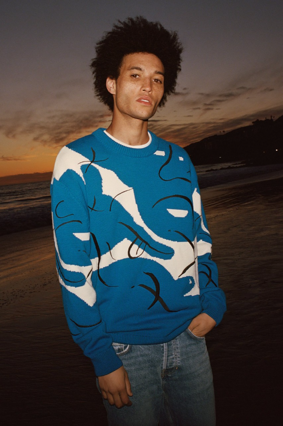

In [57]:
img = Image.open(_pix.src)
img.resize((int(img.width / 2), int(img.height / 2)))

In [69]:
endpoint = 'https://api.omnious.com/tagger/v2.12/tags'
headers = { 
    'x-api-key': 'z75BOQL2oFIepdufKGm8kqYtNnybCVHUZag3XPi6',
    'accept-language': 'ko'
}
json = {
    "image": {
        "type": "url",
#         "content": _pix.src.url
        "content": "https://tagger-image.s3.ap-northeast-2.amazonaws.com/e398336e-5746-42a6-8f61-620853d8b899/20181639-81b8-4b52-b88c-3d52a2f9f352.JPEG"
    },
    "context": {
        "id": _pix.id,
        "detection": [
            "TOP",
            "BOTTOM",
            "WHOLEBODY",
            "SWIMWEAR",
            "SHOES",
            "BAG",
            "HAT",
            "JEWELRY",
            "ACCESSORY"
        ],
#         "gender": "남",
#         "brand": "NIKE",
#         "currency": "KRW",
#         "price": 30000,
#         "age": "20대초",
#         "keywords": "블링블링, 테스트",
#         "productContentName": "원피스",
#         "season": "19SS"
    }
}

In [70]:
json

{'image': {'type': 'url',
  'content': 'https://tagger-image.s3.ap-northeast-2.amazonaws.com/e398336e-5746-42a6-8f61-620853d8b899/20181639-81b8-4b52-b88c-3d52a2f9f352.JPEG'},
 'context': {'id': 4034,
  'detection': ['TOP',
   'BOTTOM',
   'WHOLEBODY',
   'SWIMWEAR',
   'SHOES',
   'BAG',
   'HAT',
   'JEWELRY',
   'ACCESSORY']}}

In [71]:
res = requests.post(endpoint, json=json, headers=headers)

In [74]:
output = res.json(); output

{'data': {'imageInfo': [],
  'genderInfo': {'id': 'T0575', 'name': '알수없음'},
  'objects': [{'type': 'JEWELRIES',
    'tags': [{'category': {'id': 'T0902', 'name': '팔찌/발찌'},
      'position': {'x': 0.39814454, 'y': 0.54648435},
      'item': {'id': 'T0908', 'name': '팔찌/발찌', 'confidence': 0.49971667},
      'colors': [{'id': 'T1700', 'name': '골드', 'confidence': 0.98960555},
       {'id': 'T0328', 'name': '레드', 'confidence': 0.86267793},
       {'id': 'T0447', 'name': '와인', 'confidence': 0.21548837}],
      'length': None,
      'details': [{'id': 'T0923', 'name': '체인', 'confidence': 0.08632324}],
      'mainMaterials': [{'id': 'T0916',
        'name': '골드',
        'confidence': 0.9988759}],
      'subMaterials': [{'id': 'T0965',
        'name': '유색원석',
        'confidence': 0.53436977}]},
     {'category': {'id': 'T0903', 'name': '반지'},
      'position': {'x': 0.5632324, 'y': 0.28652343},
      'item': {'id': 'T0910', 'name': '반지', 'confidence': 0.8009508},
      'colors': [{'id': 'T1700

In [67]:
output['data']['objects'][0]

{'type': 'SHOES',
 'tags': [{'category': {'id': 'T0497', 'name': '운동화'},
   'position': {'x': 0.36591798, 'y': 0.596875},
   'pairIndex': 0,
   'item': {'id': 'T0517', 'name': '하이탑스니커즈', 'confidence': 0.47186083},
   'colors': [{'id': 'T0332', 'name': '블루', 'confidence': 0.6227721},
    {'id': 'T0333', 'name': '네이비', 'confidence': 0.09614904},
    {'id': 'T0448', 'name': '스카이블루', 'confidence': 0.092611425}],
   'heelHeight': {'id': 'T0533', 'name': '플랫', 'confidence': 0.83602333},
   'toeType': {'id': 'T0537', 'name': '라운드토', 'confidence': 0.72986954},
   'heelShape': None,
   'soleType': {'id': 'T0542', 'name': '플랫폼', 'confidence': 0.8809169},
   'colorDetail': [{'code': '#9f9c99',
     'name': 'paloma',
     'pixelFraction': 0.42901975},
    {'code': '#5c5d5b', 'name': 'gunmetal', 'pixelFraction': 0.096178696},
    {'code': '#123955', 'name': 'poseidon', 'pixelFraction': 0.27266014},
    {'code': '#577284', 'name': 'bluestone', 'pixelFraction': 0.11519291},
    {'code': '#141414', 'n

In [68]:
output['data']['objects'][1]

IndexError: list index out of range

In [26]:
output['data']['objects'][2]

IndexError: list index out of range